In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, matthews_corrcoef, balanced_accuracy_score, roc_auc_score, auc, precision_recall_curve, roc_curve

import graphviz
import seaborn as sns

1

In [ ]:
df = pd.read_csv('dataset3.csv')

2

In [ ]:
print(df.shape[1], ' - кількість полів\n', df.shape[0], ' - кількість записів', sep='')

11 - кількість полів
19019 - кількість записів


3

In [ ]:
df.head(10)

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g
5,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.087,g
6,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.134,g
7,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.226,g
8,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.251,g
9,62.7766,29.9104,3.3331,0.2475,0.1261,-33.9065,57.5848,23.7710,9.9144,323.094,g


In [ ]:
df['g'].value_counts()

g
g    12331
h     6688
Name: count, dtype: int64

4

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], train_size=0.7, random_state=1)

5

In [ ]:
tree_gini = DecisionTreeClassifier(max_depth=5, criterion='gini')
tree_gini.fit(train_x, train_y)

tree_entropy = DecisionTreeClassifier(max_depth=5, criterion='entropy')
tree_entropy.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

6

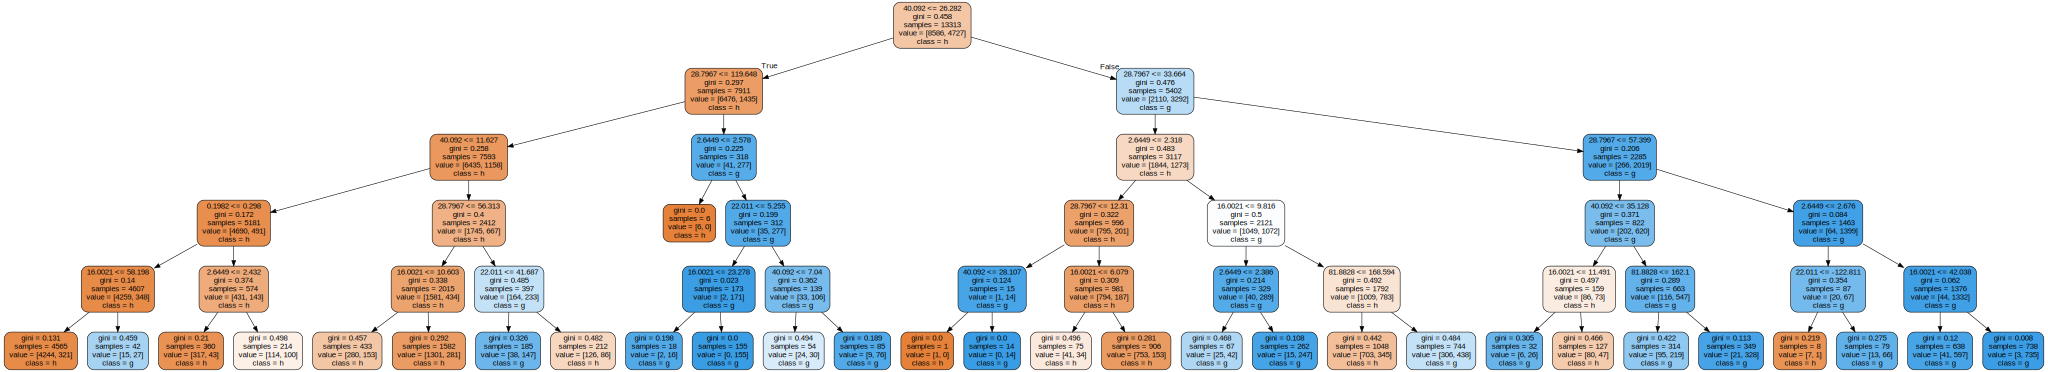

In [ ]:
img = export_graphviz(
  tree_gini,
  feature_names=train_x.columns,
  class_names=list(map(str, train_y.unique())),
  rounded=True,
  filled=True
)
graph = graphviz.Source(img)
graph

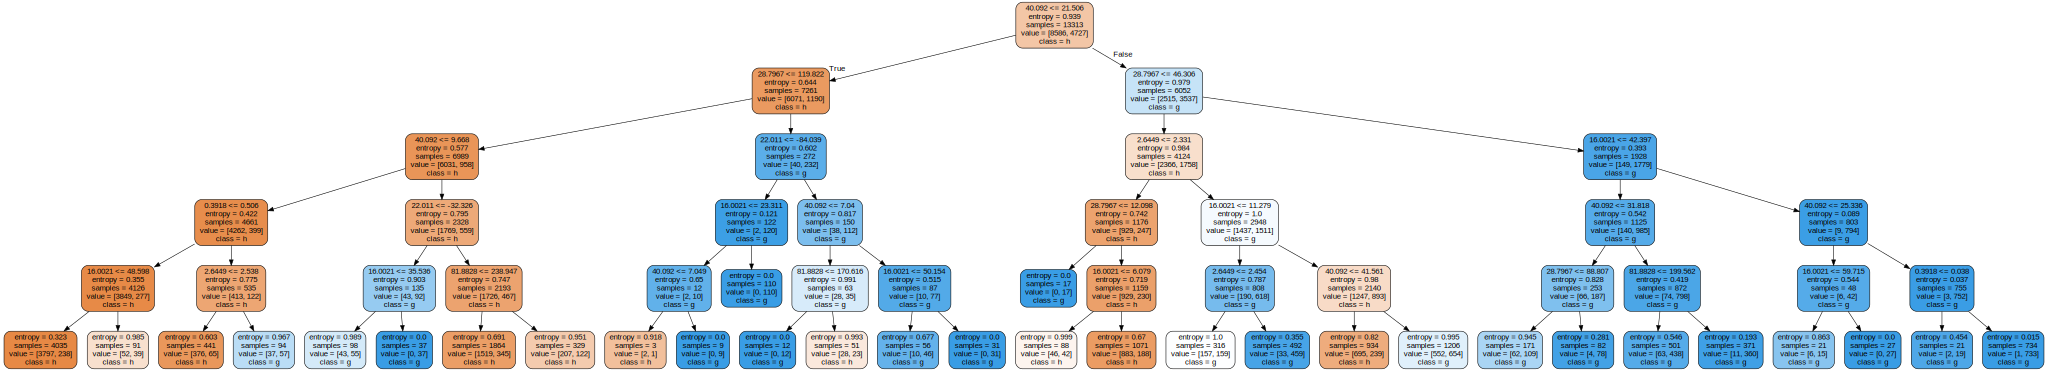

In [ ]:
img = export_graphviz(
  tree_entropy,
  feature_names=train_x.columns,
  class_names=list(map(str, train_y.unique())),
  rounded=True,
  filled=True
)
graph = graphviz.Source(img)
graph

7

In [ ]:
def get_metrics(trues, prediction):
  diction = {}
  diction['Accuracy'] = [accuracy_score(trues, prediction)]
  diction['Precision'] = [precision_score(trues, prediction, pos_label='h')]
  diction['Recall'] = [recall_score(trues, prediction, pos_label='h')]
  diction['F-Scores'] = [f1_score(trues, prediction, pos_label='h')]
  diction['Matthews Correlation Coefficient'] = [matthews_corrcoef(trues, prediction)]
  diction['Balanced Accuracy'] = [balanced_accuracy_score(trues, prediction)]
  return pd.DataFrame(diction)

In [ ]:
get_metrics(test_y, tree_gini.predict(test_x))

,Accuracy,Precision,Recall,F-Scores,Matthews Correlation Coefficient,Balanced Accuracy
0,0.822818,0.804097,0.64049,0.713029,0.59519,0.77939


In [ ]:
get_metrics(test_y, tree_entropy.predict(test_x))

,Accuracy,Precision,Recall,F-Scores,Matthews Correlation Coefficient,Balanced Accuracy
0,0.817911,0.751089,0.703213,0.726363,0.590862,0.790592


In [ ]:
get_metrics(train_y, tree_gini.predict(train_x))

,Accuracy,Precision,Recall,F-Scores,Matthews Correlation Coefficient,Balanced Accuracy
0,0.836476,0.837659,0.669135,0.743973,0.634568,0.79887


In [ ]:
get_metrics(train_y, tree_entropy.predict(train_x))

,Accuracy,Precision,Recall,F-Scores,Matthews Correlation Coefficient,Balanced Accuracy
0,0.828513,0.777349,0.724561,0.750027,0.620651,0.805153


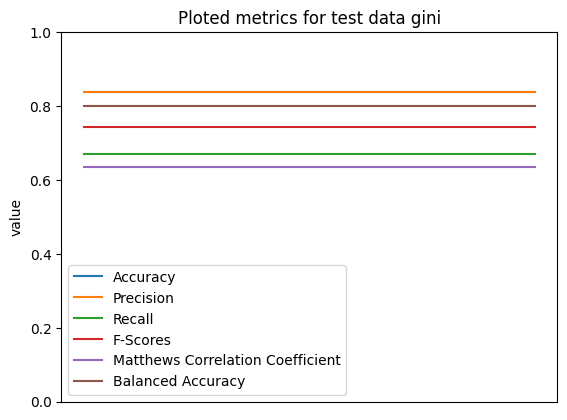

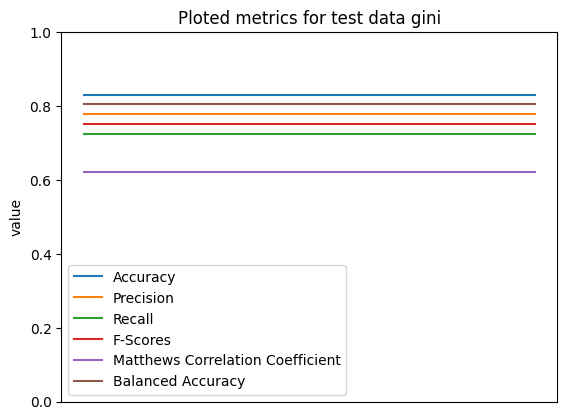

In [ ]:
metrics_gini = get_metrics(train_y, tree_gini.predict(train_x))
metrics_entropy = get_metrics(train_y, tree_entropy.predict(train_x))

for n, m in [('gini', metrics_gini), ('entropy', metrics_entropy)]:
  for i in m:
    plt.plot([0, 1], [m.loc[0, i]]*2, label=i)

  plt.title(f'Ploted metrics for train data {n}')
  plt.xticks([])
  plt.ylim(0, 1)
  plt.ylabel('value')
  plt.legend()
  plt.show()

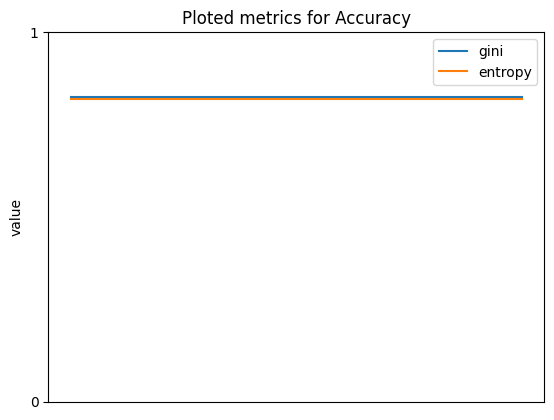

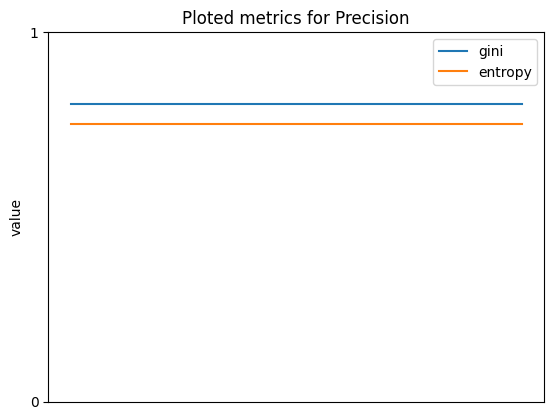

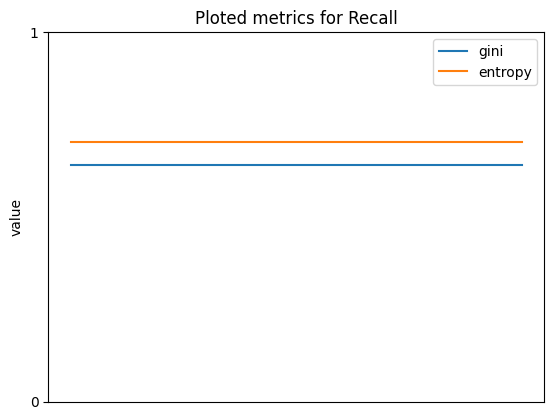

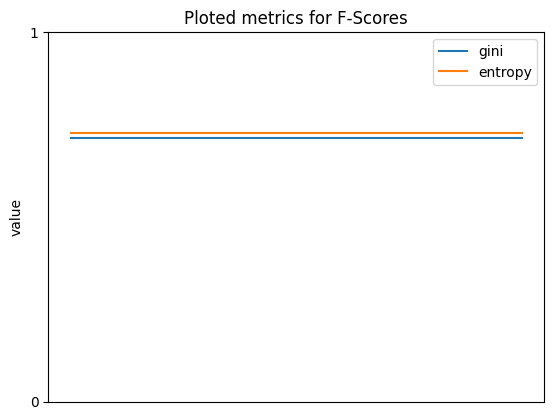

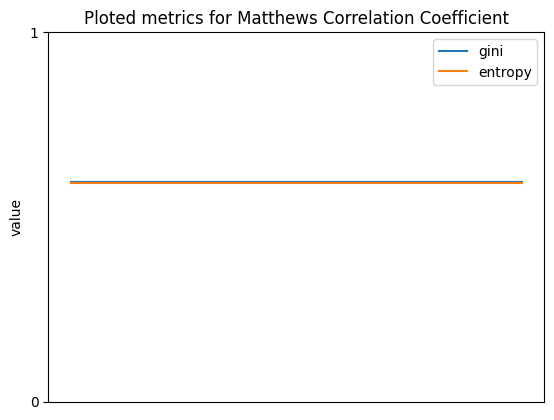

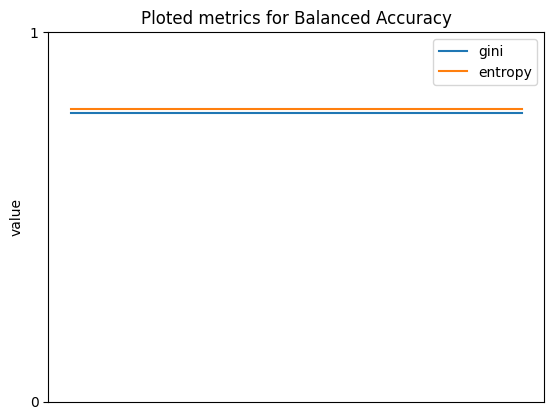

In [ ]:
metrics_gini = get_metrics(test_y, tree_gini.predict(test_x))
metrics_entropy = get_metrics(test_y, tree_entropy.predict(test_x))

for metrics in metrics_gini.columns:
  plt.plot([0, 1], [metrics_gini.loc[0, metrics]] * 2, label='gini')
  plt.plot([0, 1], [metrics_entropy.loc[0, metrics]] * 2, label='entropy')

  plt.title(f'Ploted metrics for {metrics}')
  plt.xticks([])
  plt.yticks([0, 1])
  plt.ylabel('value')
  plt.legend()
  plt.show()


8

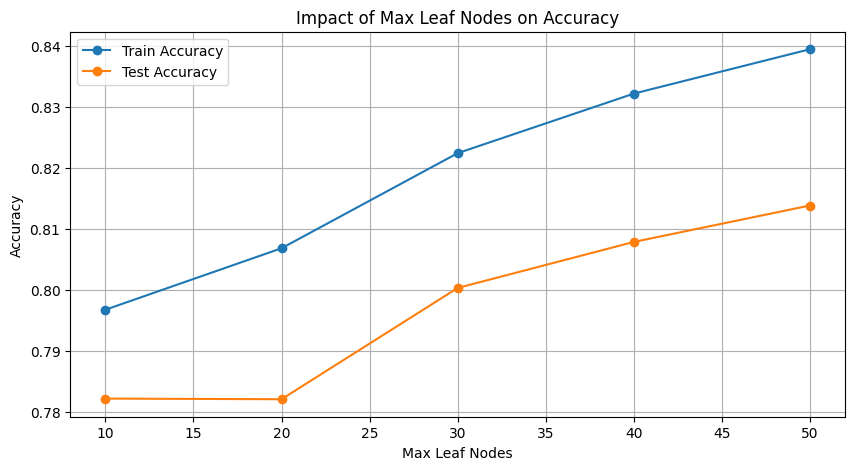

In [ ]:
max_leaf_nodes_range = [10, 20, 30, 40, 50]
min_samples_split_fixed = 2
results_max_leaf_nodes = []
for max_leaf_nodes in max_leaf_nodes_range:
    tree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    tree.fit(train_x, train_y)
    train_accuracy = balanced_accuracy_score(train_y, tree.predict(train_x))
    test_accuracy = balanced_accuracy_score(test_y, tree.predict(test_x))
    results_max_leaf_nodes.append((max_leaf_nodes, train_accuracy, test_accuracy))

results_max_leaf_nodes_df = pd.DataFrame(results_max_leaf_nodes, columns=['max_leaf_nodes', 'train_accuracy', 'test_accuracy'])

plt.figure(figsize=(10, 5))
plt.plot(results_max_leaf_nodes_df['max_leaf_nodes'], results_max_leaf_nodes_df['train_accuracy'], label='Train Accuracy', marker='o')
plt.plot(results_max_leaf_nodes_df['max_leaf_nodes'], results_max_leaf_nodes_df['test_accuracy'], label='Test Accuracy', marker='o')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.title('Impact of Max Leaf Nodes on Accuracy')
plt.legend()
plt.grid(True)
plt.show()



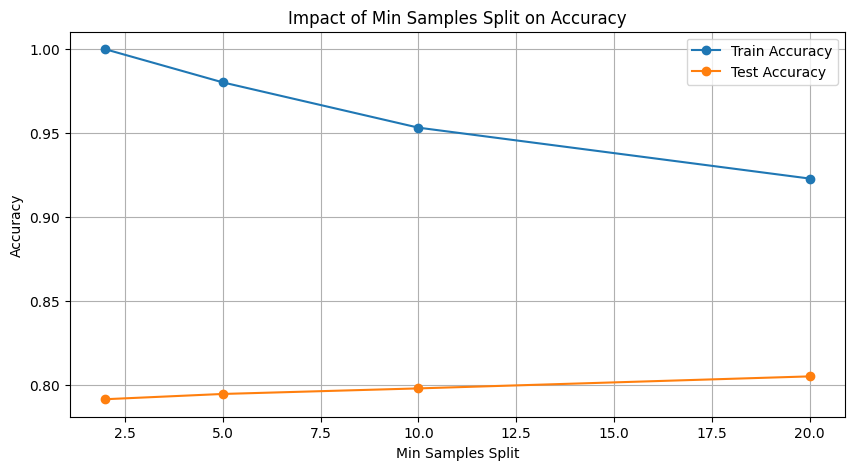

In [ ]:
min_samples_split_range = [2, 5, 10, 20]

results_min_samples_split = []

for min_samples_split in min_samples_split_range:
    tree = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=1)
    tree.fit(train_x, train_y)
    train_accuracy = balanced_accuracy_score(train_y, tree.predict(train_x))
    test_accuracy = balanced_accuracy_score(test_y, tree.predict(test_x))
    results_min_samples_split.append((min_samples_split, train_accuracy, test_accuracy))

results_min_samples_split_df = pd.DataFrame(results_min_samples_split, columns=['min_samples_split', 'train_accuracy', 'test_accuracy'])

plt.figure(figsize=(10, 5))
plt.plot(results_min_samples_split_df['min_samples_split'], results_min_samples_split_df['train_accuracy'], label='Train Accuracy', marker='o')
plt.plot(results_min_samples_split_df['min_samples_split'], results_min_samples_split_df['test_accuracy'], label='Test Accuracy', marker='o')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Impact of Min Samples Split on Accuracy')
plt.legend()
plt.grid(True)
plt.show()

9

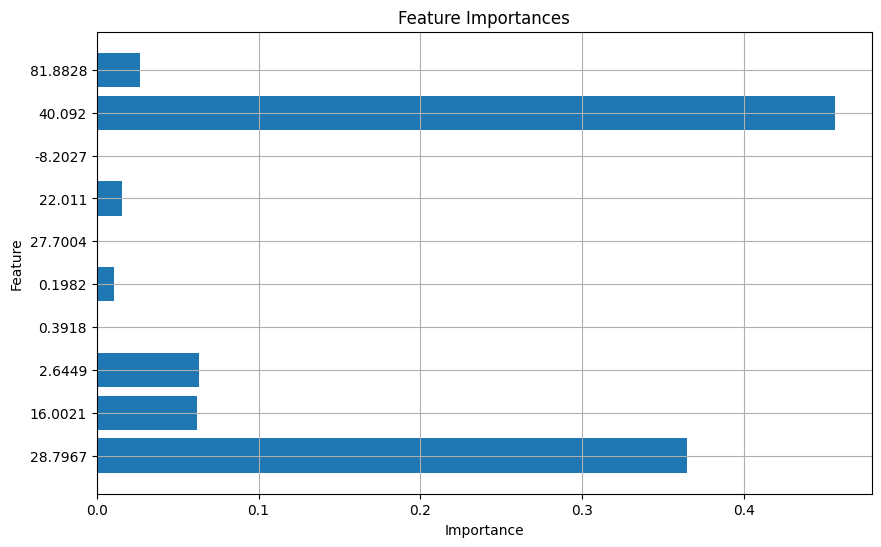

In [ ]:
final_tree = DecisionTreeClassifier(max_depth=5, random_state=1)
final_tree.fit(train_x, train_y)

feature_importances = final_tree.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(train_x.columns, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.grid(True)
plt.show()